# Numerical analysis

<div class="questions">

### Questions

- What computational/numercal techniques can be performed in Python?
- What tools are availble for analysis?
- How can I learn more information about my data?
</div>

<div class="objectives">

### Objectives

- Generate a numerical model.
- Interpolate missing data.
- Run the scikit-learn k-means algorithm.
- Plot 3D data.
</div>

## Numerical models

We start with the numerical solution of a very simple differential
equation. In fact we choose something simple enough that we already 
know the answer.

<div align="center">
$\frac{d\theta}{dt} = - k \theta$
</div>

This is the equation which governs radioactive decay, in which case
$\theta$ is the amount of the radioactive isotope remaining and $d\theta /  dt$
is the activity that we can measure. $k$ is closely related to the half life.

The solution to this equation is
<div align="center">
$\theta(t) = \theta_0 e^{-kt}$
</div>

where $\theta_0$ is the amount of the radioactive material remaining.
The same equation also describes the cooling of, say, a cup of coffee. In this
case we interpret $\theta$ as the excess temperature (above room temperature). 

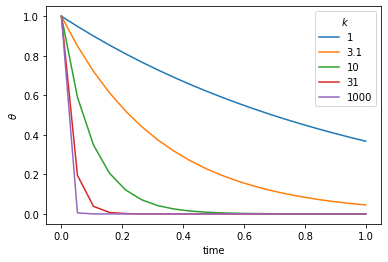

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Set the amount of isotope remaining (i.e. 1=100%)
theta_0 = 1.0

#Create a regularly spaced vector of time values
#20 units between 0 and 1.
steps=20
timelength=1.0
time_values = np.linspace(0,timelength,steps)

#Try several different values for the half-life, k
for const_k in [1.0, 3.1, 10.0, 31, 100.0]:
    #This is the solution to the decay equation, how much isotope remains.
    exact_theta_values = theta_0 * np.exp(-const_k * time_values)
    #Plot the results for different k values
    plt.plot(time_values, exact_theta_values)
    
#Add some plot flair    
plt.legend(('1', '3.1', '10', '31', '1000'),title=r'$k$')
plt.xlabel('time')
plt.ylabel(r'$\theta$')
plt.show()

We want to be able to march forward in time from our starting point
(just like the picture above)
where $\theta = \theta_0$ to obtain the value of $\theta$ at
later times. To do this, we need to approximate the original
differential equation, and, in particular, the value of the time
derivative at each time. There are a number of ways to do this.

### First order numerical approximation

Assume that the variation in $\theta(t)$ is linear, i.e.
<div align="center">
$\theta(t') = \theta_n + \beta t'$
</div>

where we use a local time coordinate $t' = t - n\Delta t$, so that when we differentiate

<div align="center">
$\frac{d \theta}{dt} = \beta$
</div>

To determine the approximation for the derivative therefore
becomes the solution to the following equation:

<div align="center">
$\theta_{n+1} = \theta_n + \beta \Delta t$
    
$\Rightarrow	\beta = \frac{d \theta}{dt} = \frac{\theta_{n+1} - \theta_n}{\Delta t}$
</div>

This is a first order difference expression for the derivative which we
substitute into the original differential equation for radioactive decay at
the current timestep

<div align="center">
$\frac{\theta_{n+1} - \theta_n}{\Delta t} = - k \theta_n$
</div>

This rearranges to give us a time-marching algorithm:

<div align="center">
$\theta_{n+1} = \theta_n (1-k \Delta t)$
</div>

In a moment we will compute some values for this expression to see how
accurate it is. 

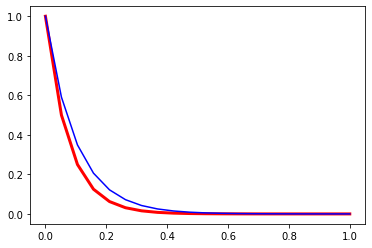

In [3]:
#Set the known constant values
theta_0 = 1.0
const_k = 10.0
#How many timesteps to solve
steps = 20
timelength = 1.0
delta_t = timelength / steps

#Create a regularly spaced vector of time values
time_values = np.linspace(0,timelength,steps)

#Create an empty array to store the solutions
theta_values = np.zeros(steps)

#Set the starting values
theta_values[0] = theta_0

#Step through the time values
for i in range(1, steps):
    #Find the value for theta at this time step
    theta_values[i] = theta_values[i-1] * (1 - const_k * delta_t)

#Compare with the exact solution
exact_theta_values = theta_0 * np.exp(-const_k * time_values)

#Plot and compare your results
plt.plot(time_values, theta_values, linewidth=3.0, color="red")
plt.plot(time_values, exact_theta_values, 'b-')


### Second Order Runge-Kutta

The Runge-Kutta method can be a more accurate approach to higher order integration solutions. The idea is to estimate the 
gradient \\(d \theta / d t\\) at the half way point between two timestep values.  This is done in two stages. Initially a 
first order estimate, \\( \hat{\theta} \\) is made for the value of the function \\( \theta\\) at \\(t=t+\Delta t /2\\) in the future. This value is then subsituted into the differential equation to obtain the estimate for the gradient at this time. The revised gradient is then used to update the original \\(\theta(t)\\) by an entire timestep.
	
The first order step is
$$
		\begin{split}
		\hat{\theta}(t+\Delta t /2) & = \theta(t) + \left.  \frac{d \theta}{d t} \right|_t \frac{\Delta t}{2} \\
         &= \theta(t) \left[ 1-\frac{k\Delta t}{2} \right]
		\end{split}
$$

Substitute to estimate the gradient at the mid-point
$$
	\left. \frac{d \theta}{d t} \right|_{t+\Delta t /2} \approx -k \theta(t)  \left[ 1-\frac{k\Delta t}{2} \right]
$$

Use this value as the average gradient over the interval $t\rightarrow t+\Delta t$ to update \\(\theta\\)

<div align="center">
$\theta(t+\Delta t) \approx \theta(t) + \delta t \left(  -k \theta(t)  \left[ 1-\frac{k\Delta t}{2} \right]  \right)$ 
</div>

Which gives the Second Order Runge-Kutta estimation for updated $\theta$ values:
<div align="center">
$\theta(t+\Delta t) \approx \theta(t) \left( 1 - k \Delta t + k^2 \frac{\Delta t^2}{2} \right)$
</div>

<div class="challenge">

### Challenge

- Can you implement the Second Order Runge-Kutta Numerical Solution in Python?
Start as before:

```python
#Set the known constant values
theta_0 = 1.0
const_k = 10.0
#How many timesteps to solve
steps = 20
timelength = 1.0
delta_t = timelength / steps

#Create a regularly spaced vector of time values
time_values = np.linspace(0,timelength,steps)

#Create an empty array to store the solutions
theta_values = np.zeros(steps)

#Set the starting values
theta_values[0] = theta_0

#Step through the time values
for i in range(1, steps):
    #Find the value for theta at this time step
    theta_values[????] = ????

#Compare with the exact solution
exact_theta_values = theta_0 * np.exp(-const_k * time_values)

#Plot and compare your results
plt.plot(time_values, theta_values, linewidth=3.0, color="red")
plt.plot(time_values, exact_theta_values, 'b-')
```

<details>
<summary>Solution</summary>

This is my solution
    
```python
theta_0 = 1.0
const_k = 10.0
steps = 20
timelength = 1.0
delta_t = timelength / steps

time_values = np.linspace(0,timelength,steps)

theta_values = np.zeros(steps)

theta_values[0] = theta_0

for i in range(1, steps):
    theta_values[i] = theta_values[i-1] * (1 - const_k * delta_t + const_k**2 * delta_t**2 / 2.0)

exact_theta_values = theta_0 * np.exp(-const_k * time_values)

plt.plot(time_values, theta_values, linewidth=3.0, color="red")
plt.plot(time_values, exact_theta_values, 'b-')
```

</details>
</div>



## scipy.interpolate

This module provides general interpolation capability for data in 1, 2, and higher dimensions. This list of features is from the documentation:

  - A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.

  - Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, ...).     Object-oriented interface for the underlying routines is also available.
  
  - Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK.       There are both procedural and object-oriented interfaces for the FITPACK library.
  
  - Interpolation using Radial Basis Functions.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

### 1D data 


In [5]:
from scipy.interpolate import interp1d

In [6]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear') # default if kind=None
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='nearest')

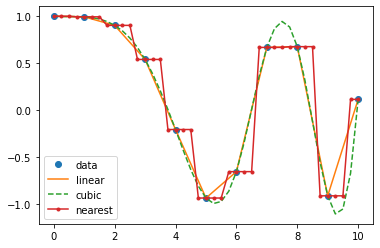

In [7]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-')
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc='best')
plt.show()

### nD data

There are fewer approaches to n-dimensional data, the evaluation for arbitrary dimensions is always for points on an n dimensional grid.


In [8]:
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [9]:
# A regular grid array of x,y coordinates

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] # see np.info(np.mgrid) for an explanation of the 200j !!

In [10]:
np.info(np.mgrid)

`nd_grid` instance which returns a dense multi-dimensional "meshgrid".

An instance of `numpy.lib.index_tricks.nd_grid` which returns an dense
(or fleshed out) mesh-grid when indexed, so that each returned argument
has the same shape.  The dimensions and number of the output arrays are
equal to the number of indexing dimensions.  If the step length is not a
complex number, then the stop is not inclusive.

However, if the step length is a **complex number** (e.g. 5j), then
the integer part of its magnitude is interpreted as specifying the
number of points to create between the start and stop values, where
the stop value **is inclusive**.

Returns
-------
mesh-grid `ndarrays` all of the same dimensions

See Also
--------
lib.index_tricks.nd_grid : class of `ogrid` and `mgrid` objects
ogrid : like mgrid but returns open (not fleshed out) mesh grids
r_ : array concatenator

Examples
--------
>>> np.mgrid[0:5, 0:5]
array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
 

In [11]:
# A random sampling within the same area
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

# Resample from the values at these points onto the regular mesh
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

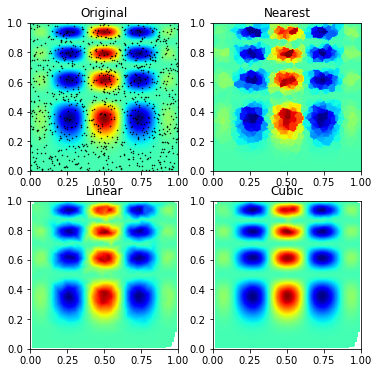

In [12]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

### Splines 

Which have the added benefit of giving smooth derivative information


In [13]:
from scipy.interpolate import splrep, splev

In [14]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = splev(xnew, tck, der=0)
yder = splev(xnew, tck, der=1)

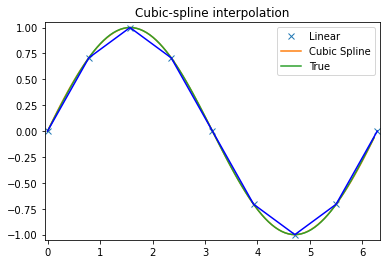

In [15]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

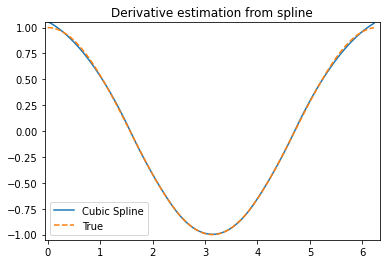

In [16]:
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

__2D splines__ are also available


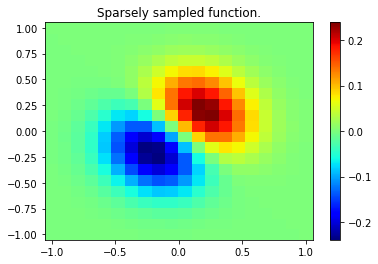

In [17]:
from scipy.interpolate import bisplrep, bisplev

# Gridded function (at low resolution ... doesn't need to be gridded data here)

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
plt.pcolor(x, y, z, cmap='jet',shading='auto')
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

In [18]:
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]

## Create the spline-representation object tck

tck = bisplrep(x, y, z, s=0)
znew = bisplev(xnew[:,0], ynew[0,:], tck)

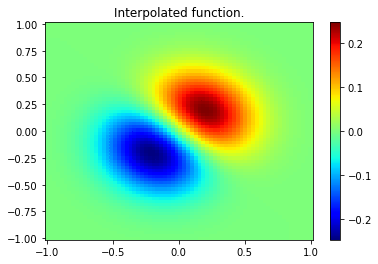

In [19]:
plt.figure()
plt.pcolor(xnew, ynew, znew, cmap='jet',shading='auto')
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

### See also

  - Radial basis function interpolation for scattered data in n dimensions (slow for large numbers of points): `from scipy.interpolate import Rbf`
  - `scipy.ndimage` for fast interpolation operations on image-like arrays
  - B-splines on regular arrays are found in the `scipy.signal` module
 

## Clustering data with scikit-learn

Here we want to explore a neat and efficient way of exploring a (seisimic tomography) dataset in Python. We will be using a Machine Learning algorithm known as [K-Means clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means). 

Data is from: *Li, C., van der Hilst, R. D., Engdahl, E. R., and Burdick, S. (2008), A new global model for P wave speed variations in Earth's mantle, Geochem. Geophys. Geosyst., 9, Q05018, doi:10.1029/2007GC001806*


In [20]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

Load in the tomography data set. Assign the column vectors to unique variables (for clarity).

In [21]:
tomo=np.loadtxt('../data/ggge1202-sup-0002-ds01.txt', skiprows=1)

lat=tomo[:,0]
lon=tomo[:,1]
depth=tomo[:,2]
dvp=tomo[:,3]

Now run the clustering algorithm

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(dvp.reshape(-1, 1))

#When completed, check the clusters the algorithm has identified.
print(kmeans.cluster_centers_)

[[-0.2770305 ]
 [ 3.92536372]
 [ 0.25228711]
 [-0.03758588]
 [ 1.82168895]]


Note, many functions have been "parallelised" and tuned to best take advantage of your computer, see e.g. for more details [https://scikit-learn.org/stable/modules/computing.html#parallelism](https://scikit-learn.org/stable/modules/computing.html#parallelism)

You can have a look what the labels look like. It is essentially a vector the same length as the data indicating which label it has classified.

In [23]:
kmeans.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

Choose one of the clusters to visualise, so subset the data into new vectors accordingly

In [24]:
centre=3

latClust=lat[kmeans.labels_==centre]
lonClust=lon[kmeans.labels_==centre]
depthClust=depth[kmeans.labels_==centre]
dvpClust=dvp[kmeans.labels_==centre]

Finally, plot the results!

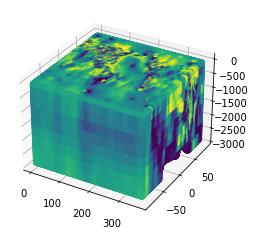

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lonClust, latClust, -depthClust, c=dvpClust);

<div class="keypoints">

### Key points

- You can use Python to solve math equations
- scipy for interpolation
- sklearn for clustering
- New ways to plot data
- Read the docs to learn more
</div>